In [1]:
import tweepy
import pandas as pd

In [2]:
consumer_key = '41kQtMM8K3iVa9rJMrV2EheaT'
consumer_secret = 'MbJoePmBGFg0GMmBA79ZFxCRAddZh1pMsavPt3so37rmdgHu7r'
access_token = '757947804119695360-e1yB1Zvj2B673Aw5Wavlcnq5YQuYOU4'
access_token_secret = 'Sk62eIgyhoR7SmTpqygDpzq7HdBBRZqFDdmvScD0Vq27K'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
me = api.get_user(screen_name = 'JoveljicDejan')
me.id

1542248113854898176

In [5]:
user_list = ["1542248113854898176"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

3046


In [6]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 1210627806 #Set my user ID as the source 

In [7]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

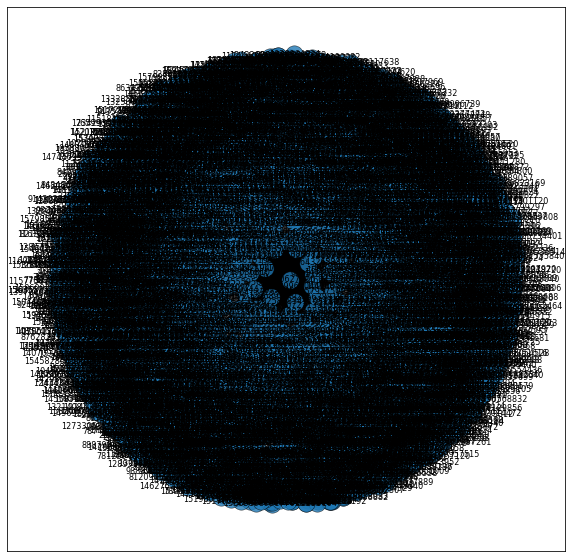

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [11]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 450 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    try:
        
        # fetching the user
        user = api.get_user(user_id = userID)

        # fetching the followers_count
        followers_count = user.followers_count

        for page in tweepy.Cursor(api.get_follower_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 500: #Only take first 500 followers
                break
    except tweepy.errors.TweepyException as e:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

1394613760258609152


Rate limit reached. Sleeping for: 442


829
1552558810602291200
45
1583890683450036224
50
970293907
error
1216089877235884033
17
1570008376691531778
28
2387971543
300
1598959967276597249
32
735149695
5000
1493645629540556800
785
1598841906510692353
40
1060384396631404545
1675
123975851
9
177917039
319
551752143
error
1475309478794850307


Rate limit reached. Sleeping for: 888


2
1597722886491488256
3
31515041
53
1598373812399005697
1429111112893616132
87
1498797995353124866
1575420996076687360
47
1281297443171307520
error
1562362955563315200
18
1156781334976589825
4
1458931033806716930
114
1048877808838221824
158
1534225546929913856
1597659662433849346
50
1491541866529304576
100
250722570


Rate limit reached. Sleeping for: 890


2223
1588541829586292739
18
1554109524533190658
202
1064976973888462849
336
1061351364561899520
218
451572544
239
624505563
138
2896624431
375
1319658404
51
1079738396
110
1429925066041708547
1772
1197350001720070145
error
323120994
24
16313158
78
822215334677594113
589
1596645729207930880


Rate limit reached. Sleeping for: 889


1588621452022013955
11
1574705373163839488
29
1596492007933095938
6
158607548
282
442338605
1050
1511769505248292880
1588383743026364416
55
1552727870832885760
527
1497840686401347584
4
1544515111750082560
134
1563557931534036993
249
1556201527
76
1390678295864233984
320
20540509
1679
1586017897448497152


Rate limit reached. Sleeping for: 888


1516271391896526848
3
1446296653
328
1562653701633761283
308
889186387
384
1410555779812409347
84
282169998
925
1055184417818398721
157
1486490007640629249
53
1582398712327938056
129
3307993929
1036
1582289466848432128
47
713801335347548160
160
1589610132807237634
18
1514482987668226050
52
4174661063


Rate limit reached. Sleeping for: 884


76
4338124454
775
1038545730
149
713824056395608064
21
1594506428307365889
2
1594736502562357261
1545810435848503296
85
1525617788697694208
523
1167172170696613889
75
1457117532578406402
error
1478468976153972739
5000
1537782662131228672
337
1559700944614334464
error
1242939510725300225
506
1443045961563926529
18
1551820388174274561


Rate limit reached. Sleeping for: 881


63
1567656791839842304
790
1594511689784885249
37
1495038183934943236
98
917117600542412801
622
1549687748738654208
231
1568208686941671424
626
1379836449650962434
100
1544061717155614722
33
1467421139068768258
6
1594390812724318208
4
1110882545351180288
46
1590089234131881985
62
626938847
292
1579854901076713474
1240
1494047987026337800


Rate limit reached. Sleeping for: 883


21
1592183808958177280
9
63476985
1591487881591357440
4
1536010832647229441
21
39930469
5000
323033165
256
1278425744956370944
error
636047857
547
1504713463033081857
1
232260510
91
1425627194672418826
313
1578525593796333575
119
1573073689347866625
30
1588876012749824001
59
1589498870081675265


Rate limit reached. Sleeping for: 884


30
1487788375880970248
1452665874435899398
125
4720455698
185
1592619928368054278
10
1462762489528131594
164
1561489638761459712
15
1433679822153297920
83
1249134241436315648
221
1591468322855460865
38
1591625459644579840
5
2521553648
712
1591543491439509507
37
1587354689280016384
313
732271040823463940
324
71006916


Rate limit reached. Sleeping for: 885


180
1590767857851244544
87
1590761686264205312
10
1515725145624973312
79
26211054
5000
90661198
5000
1588017917869887488
30
1497710938992087049
31
69180554
555
1577969029024825344
598
1582012092072267783
51
1314446660056100864
173
1589949812623171587
2
1165302049359224833
481
141664648
5000
396577487


Rate limit reached. Sleeping for: 882


5000
66587520
error
63796828
5000
60228837
2242
1493107402031304704
7
2874350591
244
1572276033612546053
145
64466675
299
1230307796
3097
1013220710909644800
17
1588996604496846850
1
1588994831698624513
48
1102326286138130432
1532
1588513895177658368
69
2596718851
104
1249493271782379520


Rate limit reached. Sleeping for: 884


103
1588264518529953793
error
1568792864603213827
105
1537200201957576706
24
1587895979730239489
13
36923181
4
305749643
error
21332764
error
1442584702980739076
203
1587531105858641930
1161522585261268994
99
4786125019
15
1580798789258186753
33
1531841955725864960
error
434147403
5000
1493322593960701956


Rate limit reached. Sleeping for: 887


79
1403181756572782594
1056
1523746604150411265
48
1331104232
10
1586312324977147906
204
1580993131465637889
119
502169252
5000
1177527665420656640
123
1220293795
28
794276665
768
1586092323120750592
135
117442354
74
1355584783728992267
5
1354498155522519046
5
286332740
454
3986309865


Rate limit reached. Sleeping for: 885


1
279501621
798
1510404192116125706
11
738706639612694530
1765
51841810
87
1423687430968942595
1414282413157593088
178
1575202838338322465
9
728300609808568320
40
868449723644096512
678
502126323
232
1259612767528669184
4713
1498245740010819584
1
2808769933
697
1480993851397623812
129
1066435290380808192


Rate limit reached. Sleeping for: 883


99
105707554
360
1078710835
41
754265695488212992
97
26723150
5000
1333890715529736193
41
1568239810900377602
84
1525042443212754944
error
1564349225898577920
268
1357455292112502788
13
771409311943778305
494
1554406112241270786
39
811335535516061697
579
190445252
74
861538463384031232
192
1071457998


Rate limit reached. Sleeping for: 884


70
1258765579172720641
580
1225543396594536448
88
3193830590
72
3234183134
182
580679206
115
1583572197125197824
2
1429611743920066561
3
4385782872
114
744712674
39
1436720151714357252
432
3830211432
3566
1582080108067799050
25
1505860387794739204
2396
1561860455529734144
5
844747445972062208


Rate limit reached. Sleeping for: 883


33
2249208548
35
266131426
179
485384679
38
2155868729
465
807386215871705088
173
9571832
error
879443628904534016
26
1432427564442607619
141
1575413103264776193
106
829740003370504192
120
1240775526123364353
23
1342663578667671555
3
2620114387
32
1462014768340951041
56
4175027173


Rate limit reached. Sleeping for: 886


571
923042200392536069
99
1518677037673766912
266
29111650
4989
1573834194714710018
14
3013228025
55
1423378074037596164
26
65501180
577
763752421629755392
5000
782023729
455
789510731284688896
4
2667589778
436
127679139
error
28367404
242
484648914
422
2427919515


Rate limit reached. Sleeping for: 884


50
93911526
69
2368535083
error
16232921
70
91454381
5000
1136160917987610624
12
1544551371025764352
101
1506737469600854017
error
265723997
354
3964935078
172
38801928
159
375040963
529
1611565296
1777
350939746
194
779119852631891968
error
1541997081719611392


Rate limit reached. Sleeping for: 886


34
960585782
121
1301385080053481472
4
1560686662530830344
70
2889193081
error
2426409534
710
322846647
703
1583666585004228608
1
1205586720986550272
7
30063709
1954
2374706326
429
1388517157
1474
857773656096636928
164
727579052
445
1467960874266734592
40
3324182671


Rate limit reached. Sleeping for: 886


46
1581880254431305728
2
1568681364437737474
42
1217309927816851457
96
2149117472
297
1461753638796161027
57
29956909
error
1499022129798557699
error
290110678
350462905
486
330150232
3291
1438688370297905152
172
194295469
91
1329347319091740672
51
620129333
468
1540142786145550337


Rate limit reached. Sleeping for: 885


379
5666812
90
1261078676051038210
3
285338412
607
175280031
956
1150970534512824322
162
236183965
464
2754990352
218
1324844870490468352
69
1567199569787916288
105
1236765454338670593
error
1018426779864686592
129
37039028
102
1398465032
66
1498047673366036480
10
4659165612


Rate limit reached. Sleeping for: 884


289
1627339346
186
1341569987656368128
9
61046535
error
1351470054500569090
9
2917281458
228
1207386735203749889
5000
506760077
851
4754519250
416
385020965
347
1269405778076594176
error
18205109
393
16607588
5
200402992
138
1416255900638007300
78
1083771578834395136


Rate limit reached. Sleeping for: 884


301
134912593
error
633633954
519
1036894496926195712
30
3309137924
108
379569387
2529
1371889011355086848
69
1547456403995914240
19
201350531
1046
3047366534
428
1557582801783898112
2
164980536
error
1559787698117681152
78
1369018188311183363
229
1143567887614873601
442
1347162270


Rate limit reached. Sleeping for: 885


400
1564142869606043648
20
1555760226321584128
15
142966971
192
606543699
144
1574190465095675904
73
1582877970951086080
2
1582916164585656320
2
1397040443976650761
10
1487519249203662848
285
1215779836712701954
1040
1574295710991777792
3
1581600342260781056
2
1494756035910852612
254
1340126703193079811
4
1499461830208593920


Rate limit reached. Sleeping for: 883


485
2847904442
46
1556402520800509953
29
1425249235637780487
93
1582474860579758080
1
1579985138913464321
4
1566019841576009729
223
1566226224648663040
3
1578142276420788225
42
535956558
168
1576622304578117638
65
1573227429920899074
32
1577517936511660032
22
1580591424533168129
68
1360208640679018502
1197
1234548920388182022


Rate limit reached. Sleeping for: 884


49
1581471649064398848
1
1166394002
568
1581704380700467200
15
1710959480
170
200007612
5
1581602260806782977
3
1553764133140660225
54
615429541
72
1580420267188408320
16
1239178466593046532
4
830357237222694912
60
1581531335583227904
853626855429165056
95
23020610
517
2568345906


Rate limit reached. Sleeping for: 884


118
1536829445750677505
error
1531761178162118657
5
45445652
error
2372900556
error
201128603
525
1445224887786696708
62
603680731
232
1427398885480275972
120
1571545286413017088
95
1572030748781170690
37
1138622070772903936
95
205386818
148
942279432
44
4550234534
35
1315487659746226177


Rate limit reached. Sleeping for: 885


1
1562952798786174980
66
1571362528315281408
41
1421224826539233284
107
1279826524045053952
147
450585142
48
1515378229724524550
83
39714842
5000
202113470
290
1577686129419161600
18
1089891445
237
2302144296
37
995984233234563072
49
44176514
114
748005493
79
59371073


Rate limit reached. Sleeping for: 884


16
1578085266933284873
6
63095847
228
1088119184779808774
63
336597086
624
1346942173594357762
9
411398535
62
1214156204085088257
11
1569694356298432513
733
129907912
244
309665759
85
740594489123700737
248
1416126711566110724
441
2560835415
18
2451538584
125
1485149890548477956


Rate limit reached. Sleeping for: 884


353
1578889083434196992
57
1334427918777380865
1800
97212034
error
1568687309314314243
51
1445123327819870212
5
1098793180869287936
error
1579699796863963136
3
516284586
162
771908214
528
1530233886785028100
error
1563358637401456640
82
874092779747643393
89
1292419370941943809
7
1574157585191768064
390
1560760585393946624


Rate limit reached. Sleeping for: 885


2268
204890617
44
1279366565725720576
474
1264927544299659265
97
1566847766961295360
215
1562909039691894784
261
1538423793168920581
12
1543944434206769153
1
737263707240030208
98
1491816416382750723
76
860250955480039424
258
315933228
265
198705069
700
763097646911266818
580
1439751224128008192
307
1170057736790265856


Rate limit reached. Sleeping for: 883


105
420631693
865
279201199
903
3926915474
197
1041427878804631555
71
1496856701533921285
14
1395892510468288521
111
1513432987819466752
46
4498976417
1
1413661176823648257
52
507856992
154
927622937473175553
155
1578630225960706048
25
101607859
215
781259406977724416
40
1578127019874942996


Rate limit reached. Sleeping for: 883


120
1578412682377826304
36
203297578
41
1250872428831653889
46
1521929325410676736
51
979034862
13
248945218
72
1434408472007872513
115
1726598401
988
251291248
668
1379888607985598472
19
1546472885300109312
25
270803139
804
837788666093256704
181
1344400747010678793
11
168857502


Rate limit reached. Sleeping for: 883


469
2624644178
18
1459541147299336206
47
1474861971489144836
291
1444002498306625538
2
1479891329861701637
76
2919935593
1162
1019166585112711168
42
1472194501942853640
1285
3295563820
38
1548006375191523333
13
1577726734509559809
3
4015077252
2
1013171633157070848
4
1573965663215001600
46
376369441


Rate limit reached. Sleeping for: 884


233
1068628694955110400
78
1577127679266004993
74
1513127969950158854
91
1151826490499072000
319
1407788363143434244
5
1445746473103020035
1428432835329892357
216
307764786
92
1339932417273049094
921
865502640
42
1054906447
1358
1116031361528279041
13
851809661401673729
1052
981580011315621894
36
1344562103936561153


Rate limit reached. Sleeping for: 883


94
1470465271
117
1517050676567805952
11
281517556
8
3022360846
error
412198312
48
1548928938373570562
36
2154056612
22
1242262644045647872
16
1414629617944649735
29
2796975953
612
1069597095106088960
441
1497689530740006913
14
153236825
124
88774234
46
254328232


Rate limit reached. Sleeping for: 883


66
374021809
309
1292484539407835142
150
1224431208794329088
29
35484318
374
2185392698
741
49900750
84
1244339460810170368
26
1229068312639705089
80
1575564222771200007
9
846625817543131136
330
1575850623303417856
104
1500847167916982274
129
1576756710294708225
1505985034217418754
81
2943589565


Rate limit reached. Sleeping for: 883


521
1575847005145878528
3
1576076219463847937
12
1447049306150670340
27
3167845196
5
66226496
295
1205452197581983746
180
82197046
1300
63086816
1254
1501595565431439363
13143472
174
309449092
117
1394392484957106178
5000
1570252007109455874
error
1168558171373350913
2
613049763


Rate limit reached. Sleeping for: 883


339
36402613
421
522474386
131
1176954155413331968
error
121903182
202
390561586
137
971914186698645504
2120
728644857191751681
114
1456372156170969101
21
1574509250763636737
6
1575760390721458176
17
1467587540903501834
24
1492362986970923009
183
231436743
970
1483037979077660672
36
151765660


Rate limit reached. Sleeping for: 883


526
870777282
2295
1534922865056878592
57
4877622861
469
831188605527691264
1289
1572346267174588421
146
1565585205498417155
26
1409498043322449924
221
1571928053235728388
22
1559669095251025920
312
1574423887646973952
87
1572991139879215107
24
3988982772
error
1558535235603668993
63
1573710420573130753
24
1438986780112457730


Rate limit reached. Sleeping for: 883


259
1492117417727823875
51
1380975313224527872
error
782164438233255936
162
1573998323836534789
52
886755497872732160
8
1573888215651524608
1560406479873646592
83
1490131271376416770
615
1569481386729545728
4
1570607138795360258
115
48717188
788
2170856592
269
1571916315694071810
36
1065015895100203008
130
1564870263900147712


Rate limit reached. Sleeping for: 882


177
1560957471744729088
194
1532341014333206528
2
1568965284375003137
121
1104484787421495296
28
1528656074399633408
152
1570514127679885313
112
1509954450433191937
2
1079038650568998912
error
1567999158094528514
28
1563731838392307712
163
1523345904907919361
2
1507996486331604993
663
1387540407878356992
36
707041508671684608
344
1454533505111756803


Rate limit reached. Sleeping for: 883


18
969015197183569920
117
1448289510719164423
749
128459766
17
1571196701968310273
4
1482756044162060297
400
1544476824436183046
27
1559027676383518721
8
900628668
154
16442767
236
260161687
10
2540652754
184
233728245
64
1571307698540396548
25
297160548
239
1087436075772116997


Rate limit reached. Sleeping for: 882


147
254029006
351
1570575869550432259
34
1560557535500845057
20
1567293050971373568
351
1570889386472140802
835414407052148736
41
1570007455421063171
26
1570702537879158787
1424048813904470022
311
1214312139701153792
60
351273204
1109
933418838
81
1262802925769969668
151
363186364
45
2296435248


Rate limit reached. Sleeping for: 882


38
924392659459985408
37
1220027104609406976
24
1556888163255066624
3
2388353204
27
1569596111165456384
3
2989950039
707
1569964323056877568
3
1363136012898172939
612
2342884706
13
1045885355185004546
71
55669705
465
110512021
359
1505258992284549120
57
830719730260533254
784
1390837249756090368


Rate limit reached. Sleeping for: 882


106
1556692264327335936
59
1569047152827203584
844
1544826090505502720
181
128417723
763
1549280559788183552
225
1453752316675383297
536
1568689389882195968
4
1093410209714733056
10
1421641338
23
1524007973961584641
error
1454206561530880000
30
1371697792796737538
2
1420789041956458497
253
1568628449849536514
241
1490159151426805762


Rate limit reached. Sleeping for: 882


14
1544610324157972480
37
1540026834741391360
93
1438451643096391681
97
1153924378561658880
84
1291904904085352448
240
1371199952181989379
46
140954176
170
1518205755052208129
256
1482554245
415
1392596079368093697
105
1262994445730934785
1
62677705
392
488036006
1645
588587379
148
2473907912


Rate limit reached. Sleeping for: 882


5
1264237842307432449
703
1564686529233969152
84
1459264224165773312
10
38171706
34
1559605962465574915
250
760791656358699008
45
999816690
11
4394300243
372
1274336917333651458
36
1375593876384321539
45
1294764962510974979
125
101710404
7
1190344003205652480
570
1398930626351337478
77
1331178616424701953


Rate limit reached. Sleeping for: 882


28
1565446891155759104
1
1435827559829172224
error
157451690
1148
1353187937681215488
23
1418732201802305538
28
1567082904752386050
6
1491634759268638730
1534342969448222720
26
15064972
613
1510365665231839236
78
1225077537505796102
55
1482008083987640323
207
1427582870797930498
error
1563614195488378880
19
1160323070952738818


Rate limit reached. Sleeping for: 882


23
1160921927130722305
37
24438288
146
56737711
415
1543629258848870400
10
925917891551051777
4
1440469311244537862
31
2502027957
1078
1296731774727475200
22
1566489390662070272
31237332
error
1566353690327384064
3
1562840264300830720
1259560609861025792
62
1649776656
111
1560256821210001408


Rate limit reached. Sleeping for: 882


209
1525200374004588544
1474574271221485574
1225
481295501
75
1565611762501705730
126
1563479662361120770
error
955453466628980736
79
1548588195289473024
298
19585156
14
887723709225512960
error
1427280371377442822
84
51200324
183
1560756691796463617
16
1562069883679961090
1
1166524593751724032
error
1361964188747390978


Rate limit reached. Sleeping for: 882


1050
1420350210048503812
54
1318206143676764162
22
31624420
2240
1543488173082157056
19
1499675740840861698
99
1564110220963778561
15
1160697504675041280
13
1445147581055750145
373
290591003
1041
1559254316501946369
364
1526137739703422976
error
175916840
62
368154473
298
75157962
970
1381064559880982529


Rate limit reached. Sleeping for: 880


80
1540466013405421571
15
1274700058647134210
184
1565046804835475456
2
1563746243947495425
7
770811446
24
1111108660627832832
326
299745336
6
1083554082466549762
477
1490638712606281734
76
897170236520058880
203
239701451
193
1390707930144514048
1162
2172471324
5000
43281465
288
45937118


Rate limit reached. Sleeping for: 881


402
172290281
1367
524697874
19
843877012980858882
error
993629501673426944
37
706981005647749122
5
1564310980414394370
1434468154613321734
49
34434177
93
1232480712890056704
7
1160590935052308480
58
1544832974776066048
239
603631050
error
141542960
225
1564210171802427395
5
1534303893202644992


Rate limit reached. Sleeping for: 881


399188307
108
1379593961090715653
83
22743904
169
606921583
292
1331002438065778689
124
1276201434740953088
43029576
1666
1053326817623449600
213
1403412547240443909
92
1559507564206952450
25
1308712371301617664
69
821425053615198211
43
87885198
error
1127217163738046465
212
1563363371612680192


Rate limit reached. Sleeping for: 882


1076338083044372481
173
588814926
285
1558581697855242240
46
1250167861454217216
1
380500956
101
1561703509325746176
203
1468866670588485634
805
1403020115646550020
10
1491558504141836294
160
1234314453337825281
2
1228870200524587008
error
1542737011324293120
13
1209331266824364032
171
2559809441
40
712502686604615681


Rate limit reached. Sleeping for: 880


211
1265820206045282307
762
3012824297
338
619692983
194
1254534061625872386
2
212933732
158
389697514
373
1438080349502799880
2
3283732380
419
23890654
52
1378838141415620616
29
820160090997067778
211
1419319480010805249
523
1561118221276692483
22
1428524023286157314
54
1562216533543137280


Rate limit reached. Sleeping for: 881


6
2701180693
31
22562309
323
1549117770528325634
61
1562061522972463105
512
3269789329
160
2934173040
101
1130487131766439941
220
43761468
202
1542254124275752963
1
1561545738395549697
1220743750575476744
6
234254568
13
1019929363880570887
206
1169663706764103680
157
1216556237933838336


Rate limit reached. Sleeping for: 880


18
14644528
571
1253849290276892672
91
1204168695968219136
86
1128803677148536832
237
2786257602
40
66434225
622
360843507
3172
1092482252879974402
90
1560656076517015552
24
1485713729593483275
462
1560910181780918274
7
123030285
2930
1490304846506909696
139
3315949360
176
1328520464831045632


Rate limit reached. Sleeping for: 881


111
1315834231
error
135263657
5000
251294922
16
270891406
error
1560940943167176705
4
1557488270866522120
19
1561007663965691904
2
1424077412808200192
13
1505524167831166982
error
1462881004213846016
132
996443594067267585
error
1321408100553904133
18
1521965016005505024
2
1513251843593416710
error
125558747


Rate limit reached. Sleeping for: 880


158
1437686122713206784
665
1490781805829672962
700
1353807440
63
1491496304412962825
error
1245645189240074240
1139
1544726370525163520
29
737146480906014721
1220
4218988699
44
881007766181003264
52
1560739054894956545
14
1496261459931799553
6
1551819260523003904
161
48338848
error
24965793
340
1490380691799957515


Rate limit reached. Sleeping for: 882


8
1484677126049652742
549
1212318780409270272
165
1321106525264486402
5000
1450249564699697153
67
1485246746032844805
58
1224990957201805314
error
1541167168515194881
7
2788226690
560
1533498015708749824
209
1551436541641244673
31
850038895026876417
25
55367095
209
1559914111990829057
error
1443445505770545153
8
1349008047897784329


Rate limit reached. Sleeping for: 881


134
2817521838
53
752547798864789504
1927
1488863798631018499
114
1505229487658708993
28
2784799650
169
86443886
error
1557877734910615553
1593
1551965305718571008
2
369161456
263
1115845501
122
2577739822
6
1456321751961542664
25
1520459563098644480
880
1193035009
error
1129212918178803712


Rate limit reached. Sleeping for: 881


38
1235580245543186432
257
1189400175510310912
28
925383854
13
1266991142580547585
136
632128959
259
958753921144623105
369
1487040246399254531
9
108051262
293
1174440458065518603
127
23134950
error
1263481664862380032
743
3099796577
461
1286270519772315648
39
311671296
333
720327289


Rate limit reached. Sleeping for: 880


49
821381972903755776
156
71326591
57
224575797
391
1209892264606126081
83
1468956126049824768
96
2260421592
108
1510223838256246789
68
1558846708041367558
1089981826242920448
648
2323894728
3181
100364677
5000
94209843
5000
1392486203119783937
484
1541367405456379905
211
4212441081


Rate limit reached. Sleeping for: 878


error
983336582152368128
5000
3892238859
66
2250953102
734
1553582869
error
723860276
1927
300999368
122
737667146877140992
2572
2889974309
27
1475640241121898496
120
1423344696076734466
20
1339361964326334466
90
84392075
352
1363015936660410369
5
2990667863
1341
2398218793
322
955129869947621378


Rate limit reached. Sleeping for: 878


326
1288685448374755328
error
625567332
369
2744313933
343
2407074449
192
126379325
88
1536492638362288128
109
310006225
1063
1544945895619395584
1
1169398828849606657
error
193178295
error
1187218710425034752
207
245471300
456
1343401046278688770
17
52682129
849
2193959875


Rate limit reached. Sleeping for: 878


2080
3433098844
98
1550906257002962949
39
845610642
78
1000160554000908288
748
558447519
error
1529885748886835200
104
2586276139
233
1484569085908332550
13
1348726786440519686
error
1557656579192807426
159
15615771
143
1531481995846377472
65
3000113633
575
1546639822244040705
5
1173752168358273025


Rate limit reached. Sleeping for: 879


error
1552693787004178432
25
1438419690414612481
156
1544721995476205568
67
1045062603297492995
204
1521358283382345730
6
1381924783613415424
65
1289930048825446400
797
2570233314
69
1557043115587997696
19
1452398254252040197
67
2409794696
1032
1498074306911387653
846
1318503228607266822
447
2933607171
1496
3255717575
error
1556297395805224961


Rate limit reached. Sleeping for: 861


38
1058800484150964224
15
466425400
2
1526777579256029185
error
1279420973163241472
162
1556706455570579456
12
1213123285812015104
36
1545468147859443716
52
164254084
104
1533953515499970560
2627900643
1394
2843450511
2
1026401846
104
1273885716964151297
116
1544168369246568448
163
1432326556811243529


Rate limit reached. Sleeping for: 866


error
1149548008431767553
50
1197356186191970305
70
975449934953562112
64
328714215
66
1554771290166333441
87
725882318292848640
98
287790409
746
1204858485139296257
3
1505902309284487178
47
2610757999
error
1255557550117978113
642
1389270329906941958
45
55394202
11
47765829
162
609315888


Rate limit reached. Sleeping for: 873


error
126933179
error
1388198121268727810
error
1461588684822700033
error
2981442773
error
633723623
error
2733220115
error
72909742
error
1539249134493913093
error
927477482751586304
error
971200672325488640
error
1397687336087998464
error
1427897893785161730
error
1420881284511911936
error
1461529067824451590
error
1534751999346020353
error
1425417665108185092
error
1427810374062014472
error
93911120
error
4694937745
error
228657284
error
799430
error
1511552846981857281
error
1363816448
error
1096958675845931008
error
1281462207289520135
error
2715065928
error
2922383130
error
1555759363234533376
error
1008410577809522688
error
1550432445895409664
error
1147456072212471808
error
1458331358
error
793203110
error
1555855078908624898
error
421889486
error
1525968948839464960
error
45781867
error
1555790419908182016
error
1555788986718765056
error
1480457215601381378
error
1541761421196677120
error
26320948
error
1515510786
error
3942712699
error
736456037587390466
error
136291335392088

error
1474469539106725901
error
1502322202959654922
error
480070613
error
322921909
error
2736709836
error
785876958005473281
error
1382111252210720768
error
1244382039681298432
error
1193946680065953792
error
1382531794474532864
error
318198986
error
1514253759701991441
error
264746111
error
185064535
error
1486625521731620864
error
1367925299246211072
error
713524548491038720
error
1136772795939999746
error
464289973
error
419204011
error
3222279239
error
967657646542278657
error
1004181518225272833
error
1401443606
error
74619189
error
1243321000986423296
error
1531034742816051200
error
1429878068819087387
error
1072643058238316545
error
1688602459
error
402517418
error
769958575833686017
error
130028669
error
1135564310
error
468855316
error
423186716
error
1279525313379135488
error
1101977216227913730
error
490008155
error
158583127
error
941620333
error
487068600
error
925134672983494656
error
35607442
error
4207193352
error
183509924
error
1441937758281297924
error
432248253
err

error
1216333766035156992
error
1216090750355681281
error
1256307806417965062
error
133767780
error
433896799
error
1482051209129349126
error
537317750
error
1518301344720904192
error
295832702
error
22603918
error
1534280181715812364
error
27885735
error
848486671855255553
error
1251921526674391042
error
1339104847493259265
error
3269653008
error
1217198255924269057
error
623853367
error
1506959293437956100
error
100271991
error
1539289574354038785
error
829437956012269568
error
1520682753846562817
error
121769537
error
73363043
error
1286786306241179648
error
373348931
error
1056627514850701312
error
486600415
error
756261965979320320
error
61697043
error
298199795
error
908973787458269184
error
1119427211914661889
error
31350693
error
833485721616867328
error
1072713976121745408
error
1284052610887020544
error
1271534318163079168
error
77210396
error
1343201899433123840
error
1096761648
error
1407092220189159430
error
1224373201431433216
error
1537544874676916224
error
1475595644676

error
53742395
error
101976856
error
393913696
error
1475210818157531137
error
1433934616545554436
error
190432987
error
1281818937848557568
error
2466898260
error
975976308743327744
error
1434561211224387589
error
1311707707
error
1429909182099034131
error
851968375978954752
error
1027074538125844480
error
2372912708
error
1397412022455705604
error
1531471659546226688
error
1234293552278102023
error
143654480
error
587850620
error
229635278
error
1013454673968226309
error
59397902
error
80733162
error
390983620
error
298910303
error
363129363
error
725214268770029568
error
503482955
error
3238182904
error
3411372972
error
630873269
error
1484064734
error
280762270
error
416655568
error
1221670183611203585
error
841402384702046208
error
1435809947829170179
error
2450933594
error
728003955972706304
error
1503494482112614400
error
3248188759
error
1304492338455048197
error
762028918249361408
error
320553976
error
109912977
error
26363131
error
142788034
error
1532790154922020868
error
14

error
1291863465120813056
error
3060075330
error
1117379810
error
1334561850726309888
error
1258297627
error
1273056284
error
1278311024056287232
error
935517798
error
60778703
error
1371162817
error
3193745707
error
1182159349768044544
error
141127343
error
168038877
error
1377243009448771584
error
1423253481633292288
error
3253405807
error
851618381291634688
error
1516881454692651009
error
2973462439
error
1100129604499496960
error
3660641292
error
776934221864579072
error
1014793497147129856
error
964019706620334080
error
1290521221163958272
error
1001782173249228800
error
830472717505687552
error
1180258683491631105
error
706369458030292992
error
327033427
error
1434574860
error
71579423
error
1236879877401272321
error
1098296110412525568
error
859454822797398017
error
1479302453765885958
error
788887908614713348
error
716345660
error
79362852
error
16479932
error
492759633
error
1316825422965936134
error
831769260259155968
error
23011345
error
1542281274395709442
error
10371496942

error
1561672825026535424
error
1593519192002764804
error
1565258103473557504
error
1224346292752699392
error
1563630432599638017
error
1562085923214483457
error
1564876128266993665
error
1565208778265559041
error
1560617341565579265
error
1561010184377536516
error
1592981482343120901
error
1562155219114418176
error
1565059536582582273
error
1560613426489180160
error
1565061155042861056
error
1578024202312986626
error
1563575679047806976
error
1560152861849407489
error
1564880591916597250
error
1571938756994686976
error
1560947759078932481
error
1561635829302398977
error
1562052935562969089
error
1561634426014076928
error
1560956938438967296
error
1561630893281886208
error
1562745134927605761
error
1448902905277390848
error
1575214846961926146
error
1565649705723387904
error
1592111527561240577
error
1562840707231993856
error
1565656288138256384
error
1561618141674983424
error
1541714428005171200
error
1541008961603883008
error
1370115093724332036
error
1571150975200624641
error
156108

error
1562020288010899456
error
1563465250422538241
error
1560984287603838977
error
1562043991268409345
error
1266462281535283208
error
1561971705068797953
error
1562428498932686853
error
1560289977749147649
error
759710008284160000
error
487337742
error
1364224940333883395
error
1317772623942737920
error
1384921699292958720
error
1450899142994243587
error
1350543621146222596
error
1445116344857473025
error
1410154814026260486
error
1452971331348205573
error
1376579176820568065
error
1466456094721683463
error
2435953014
error
1171444555046014978
error
1453057785273491459
error
494805655
error
1376082519989293057
error
1436681026848309258
error
1224753654135169025
error
1315923375336943616
error
1319739832478957569
error
1010796945617620992
error
1327963623369666561
error
1239840696846159872
error
1435178504971177988
error
1434413061360791552
error
1431521062886461444
error
1436404819816747012
error
1179278687902011392
error
1425804620694114304
error
1228068987390615553
error
1406831485

error
1360385203684917251
error
38066085
error
1307575513779666944
error
731199280602619908
error
1467243825794015232
error
1088119184779808774
error
176517506
error
2826345746
error
1203465913896448003
error
1526473133892444160
error
3635985857
error
917868254
error
1485250053736382464
error
124176307
error
211600538
error
1321131562814025735
error
50700213
error
1539522622693711872
error
2804397932
error
742678033887297536
error
363786481
error
1482051209129349126
error
17521775
error
1482838692611997696
error
460229654
error
329093238
error
890841583
error
981867430027948032
error
252557525
error
845959041423675392
error
1486641575161704448
error
1463949158138757128
error
1315374156
error
3225364365
error
1046856311219150849
error
93054106
error
1217693523580841985
error
1434145276118413314
error
1519782552478826497
error
706864227840094208
error
1419045219744485378
error
1288112706445127683
error
899352461751840768
error
2994650311
error
583196805
error
1431200080019787776
error
36

error
1015682878406045696
error
724652710021214208
error
1422007823362297858
error
912077085551792128
error
1529869631791501313
error
2553684883
error
1557098457134993410
error
1926867884
error
831994766061662211
error
1278277250119536642
error
1390310278340939778
error
17993176
error
964918621620367363
error
2271086022
error
2997538254
error
1531031811605815296
error
1548158345869021188
error
996904423585603584
error
172731450
error
1017620495125176320
error
1000644246049869824
error
262742625
error
1529224952292909056
error
1267007589008752640
error
820104969932181505
error
39824462
error
39197185
error
1005919859899879431
error
1700531414
error
43063148
error
471168708
error
1238207876541210624
error
1508103269943496710
error
3080351634
error
1523701876373565442
error
1559712660786118656
error
1555151577308172288
error
438783146
error
1532492299116204047
error
917136666
error
1563325386099867649
error
40973914
error
1528182913296220161
error
1334817006252679168
error
128870239724241

error
590114525
error
1566948230079717377
error
1574350615429320704
error
84886973
error
1199506431046750209
error
69240104
error
1636421413
error
1185244305558032384
error
58631254
error
1428457088603279364
error
1554897360928522240
error
726433404078678016
error
222512184
error
1530494976110563329
error
1270556899960737792
error
1161859013287354368
error
1025056195957145600
error
1340799958174318592
error
251705823
error
2267509268
error
3380414147
error
1274470760007061504
error
892858842714972161
error
1289299575749173249
error
900920210810695681
error
1394126240550985728
error
857311884172681216
error
1420106330719850509
error
229695643
error
347457565
error
1969832888
error
1542271256019492865
error
49823368
error
1369355332087078913
error
1594499946
error
2764283951
error
86812421
error
1220735433157550081
error
1157772437150490624
error
1550778973327867904
error
498255504
error
1338615603142148098
error
1069348267090214912
error
2792522036
error
1514579944520622084
error
934472

error
1544720191057039360
error
627995064
error
942421002796937217
error
1503457800650903563
error
1460469207276179458
error
4924760755
error
1522699109643268097
error
815112420154867712
error
1518235072977162241
error
1479075515570868226
error
1542838120936251394
error
1207937250186743808
error
960944885682589701
error
1523732788402221056
error
991444445148180480
error
1535738743805857792
error
794759371402203136
error
754394841593868288
error
838455835579793409
error
1924266361
error
1548864239183376384
error
1854923306
error
745357033432584192
error
2611054645
error
3872270894
error
885583840831578112
error
1345991880186724352
error
35567559
error
313836197
error
1098660460256288769
error
228222433
error
1359199800332349447
error
227011506
error
1078237287337598976
error
1046312423525928960
error
353592464
error
956399829646807040
error
491437962
error
1423696027253714944
error
550573745
error
21413320
error
129920646
error
513781466
error
1226365329145827328
error
1228930686
error


error
1214968059393269760
error
2379635420
error
1497611743954092036
error
1522794887397138432
error
1355247955771596802
error
1228148660350922754
error
963861041301151745
error
1068595093798408192
error
1512858647239528452
error
799345170
error
73474182
error
1410967043600420868
error
32298194
error
90535212
error
392356784
error
1325392984121204738
error
1521559771844734976
error
1485732697725042692
error
1432231816556019717
error
1416542348432093184
error
1349850279752163328
error
23148346
error
1189892786755194880
error
21825545
error
96464631
error
907963175558987778
error
540981423
error
1336336486317191169
error
1464957933901561869
error
1420432459229978636
error
2999039385
error
956940306804592640
error
1309315380649832450
error
14555541
error
1458643992996896769
error
1048898770140889088
error
31015969
error
1356409498349391872
error
1350230877435908096
error
1270465137858744324
error
1228341901222236160
error
1381056359274323972
error
1223698201607397379
error
139445259961772

error
2990088420
error
187516888
error
1249731396
error
1511361674
error
928888276567707648
error
1502304609330597888
error
4093292414
error
1416029528413982726
error
718213328384856065
error
1241795485180088320
error
1178423704889499649
error
2658190598
error
187680232
error
1367553884038782980
error
1319992593451749377
error
13708922
error
43586984
error
247560903
error
1304899477648609281
error
1316468089018609670
error
1337699294342565889
error
1311160260
error
803044731533938690
error
245148550
error
86121008
error
946808598910459910
error
1392927480093290500
error
820723171112448001
error
1517659221147328512
error
466121287
error
194168096
error
1332453302861225990
error
17030939
error
1214293322375688192
error
1268384319082463235
error
1053063122351808512
error
1021769374552666113
error
1493297996892557312
error
1280948162421800963
error
1211153840122155008
error
1631266417
error
1445753316244275210
error
1477054454239223809
error
1349728959840223237
error
1294040132887220226
er

error
253632852
error
2942349451
error
3411454652
error
22405564
error
1237602735941234688
error
1449928230069284864
error
1442807125789626374
error
15366649
error
2827241119
error
1099010778961567744
error
1134770098428960768
error
2856502861
error
1495452470327316486
error
801498298838319104
error
600398064
error
1281979789868335106
error
773695049582469120
error
566647226
error
1432044097502474241
error
830268298503868418
error
3010686461
error
537339496
error
1393974404036632584
error
1497772384220106753
error
835546532011094017
error
1113588328958447616
error
706157949576679425
error
927751333247111168
error
1477988825045606401
error
1453010135564046353
error
1061284673605771265
error
3267252410
error
1330113184443879426
error
35742897
error
1257704691821133824
error
1301605096338333697
error
2477935238
error
1328504322703847424
error
841280775395905536
error
217506104
error
30983350
error
32712825
error
1468496858
error
899803932997939201
error
1385685682530570245
error
850106934

error
1266489642385317893
error
1736702509
error
956083086
error
869605540107657216
error
2757964237
error
1004511113126572032
error
1017885211042856960
error
4120980617
error
1281386246170976257
error
1192189946397892613
error
17743112
error
2358417108
error
1337870843607543809
error
23365635
error
1476141200797220866
error
1256972788851605506
error
176414028
error
1461419077893861399
error
1439259341488484362
error
1487781273330491392
error
1014184938
error
1304921830164135936
error
1353338273637277697
error
18286742
error
1266544876998574082
error
747033967979864064
error
486905318
error
4062970126
error
1247405968289337347
error
62633946
error
1278142125708922881
error
1034646877139030017
error
504803881
error
2784663643
error
1155301996989177856
error
25298494
error
1465235395243823104
error
250296635
error
999834427
error
2461081865
error
222073706
error
752623891449647104
error
1165356346524483590
error
49162786
error
1447180762562940932
error
1032786377216151552
error
20729327


error
939067896470401024
error
1702464109
error
1471147816982663171
error
1310386217570107394
error
1040518649323433985
error
1268178790599077888
error
1423362418198130690
error
760087898
error
1293583026857955330
error
9275052
error
29169905
error
417571583
error
1296499490799718401
error
2765113946
error
449600949
error
1446275888115552259
error
71574444
error
1286418584818921475
error
948433260736004096
error
2184934963
error
3156120964
error
5778702
error
1300922800778158082
error
1247144848853000194
error
3128240904
error
26637271
error
1394154797188599809
error
771049224188338184
error
919667724535648262
error
356546958
error
16599101
error
849376476877266944
error
295003818
error
775115559696408576
error
739683822
error
39854903
error
1237200374093811712
error
1321816153086480384
error
110228223
error
1429661796680585218
error
2547255943
error
965346876529688576
error
867977228
error
1130042420
error
1433998706114764803
error
17110049
error
1032500146007760896
error
101849251818

error
65935604
error
1250771043465203712
error
1346847727536238595
error
50856520
error
1312419683065368577
error
67498723
error
861738869045297153
error
724012560534507521
error
1027941704920387584
error
1197539418250235904
error
1849478558
error
1216859681127378945
error
337012738
error
391488297
error
3146050372
error
1918204129
error
381092269
error
1021020774746984450
error
1094021282503352320
error
287451820
error
426058294
error
542723057
error
1267928242238914560
error
524752250
error
37513686
error
3242842014
error
28053949
error
885627714832539648
error
862133995471077376
error
1300414812187435016
error
2664278533
error
1232012278578307075
error
24204144
error
226822479
error
1131736003
error
868249787195301888
error
18004650
error
814925120800223232
error
2880052887
error
1458885539310956554
error
782292383450955776
error
21704309
error
935296680072581120
error
1135336751667564545
error
840047434927656961
error
109693443
error
2573237150
error
924483025
error
2350970725
erro

error
2725049924
error
4668028992
error
929416606282866688
error
2982590638
error
1297322101494382600
error
23286086
error
1133247143899099137
error
1382084016246030343
error
1156492642546585600
error
1451271984839602186
error
1312481937693368320
error
1447414898
error
903325076673716224
error
1324993788461391872
error
2686077529
error
322579457
error
980777221911646219
error
799399168452104192
error
4880717227
error
1367003282963652610
error
938261383434637312
error
1159049675825143810
error
1408661811360976903
error
49415928
error
4739388852
error
1333611906611998720
error
3101792099
error
37856125
error
914217350882193408
error
465121482
error
811597262
error
1298738592215437313
error
1428515614285602820
error
244814478
error
1271940840026517504
error
698876319698911232
error
926861903833587712
error
1348301965185458177
error
1158230081573216256
error
1722425150
error
1203152110155681793
error
336253
error
1141332474380705798
error
1958822383
error
1354204837496451074
error
14520769

error
1377844790
error
91127416
error
1313143786848104453
error
1078184509068189696
error
1364168992156483587
error
834706561
error
1158071042725691393
error
3829653259
error
2531519882
error
631460008
error
1423825222722105344
error
1312962824944209920
error
1176493456195117056
error
702356664
error
2463238621
error
1138727461
error
19806306
error
1191381577
error
3138390312
error
258323815
error
10314482
error
1086330513734930432
error
718112518753935360
error
1298823572153131013
error
3751750334
error
1057328445296967686
error
1478678268
error
24070811
error
1884008522
error
1400626416379518976
error
1342950763367182336
error
1195478870042042369
error
260634501
error
385782939
error
221743827
error
1297235946753204224
error
357494553
error
29130296
error
17667868
error
1024789887126401024
error
1218006198735208453
error
2810373811
error
153085165
error
1037136618707140609
error
1492986740
error
17277252
error
1008488353098915840
error
2592748406
error
1370095500
error
13371654877513

error
1491083205885104128
error
1431289929703768068
error
1413055064
error
2282453046
error
1538931375759364098
error
109492386
error
1387810283792568325
error
3004277697
error
872958080224436224
error
187202524
error
1505889590544056324
error
1305141398795030528
error
275146676
error
1719676428
error
563382612
error
1467676359933808645
error
1280991923889737728
error
820730408333623296
error
117939711
error
1389984294379167746
error
1442036132904980484
error
1519789845287104512
error
560774202
error
404533869
error
1039666659378618370
error
1104272751223889920
error
98448709
error
881296746915090433
error
1195060475760758784
error
20704018
error
1924266361
error
179241426
error
1523732788402221056
error
82154425
error
968578352343867393
error
864641739855986688
error
24815702
error
1888479510
error
40370643
error
112017597
error
38451099
error
52322707
error
1553960651067777025
error
40973914
error
32358200
error
1234323177993469952
error
1354171906866470912
error
1558248388113666048


error
1086835054376976384
error
1562459494918918144
error
1474931673569583108
error
1305071402412912640
error
1488249793038077952
error
1298680745012219904
error
1523068136223870981
error
298724870
error
2568140510
error
1354830156695818240
error
792878113
error
1074276408535511040
error
46444342
error
2418452008
error
69735367
error
1328368192054505474
error
564994105
error
794068885137829889
error
110975807
error
1535263426389364736
error
813608582025396225
error
1007460097071767554
error
1505990319480975361
error
1473692588641333248
error
95649904
error
624964705
error
447409567
error
946344888
error
4492057458
error
1467658429871370240
error
349090103
error
786811991394430976
error
1352061779719966723
error
1532225867094573056
error
1343240216157425664
error
513781466
error
22100518
error
1474725040222523396
error
2301844336
error
1308596911297802241
error
1541493458543775747
error
1043897490473406464
error
1552028260028014592
error
1462402306146717699
error
1409643877213028354
err

error
914278685427019776
error
1481336325752172544
error
1582494564077764614
error
1578933853435367425
error
1429924769088999446
error
1268707558568726534
error
1525133741504462853
error
325313004
error
1513993011637665793
error
2936069383
error
377097498
error
1336029411632672770
error
1565171376100712448
error
1390462102767296513
error
1050353116191907841
error
1181372273430691840
error
1323132293834248203
error
1277355551081607168
error
864799266514063364
error
1401611199809265672
error
1576348423661309952
error
1310656856369647622
error
1439239644978323464
error
1169707328230350849
error
1571906796645752834
error
1479661991862190080
error
1476262891766665221
error
1465073359696375810
error
1005940602373013512
error
1258613756843765760
error
1428510681687465985
error
1579008633777651712
error
1451004069728849923
error
2612664939
error
560080408
error
2534520501
error
1209963612
error
1483537699923501059
error
443971220
error
702390545725976577
error
1417237915566936096
error
1199354

error
1350147089909559296
error
1520625630945026049
error
1111310800440954881
error
1392596879913914368
error
1356180404303065094
error
1557311969287446528
error
1372485907165626368
error
1505941906936770562
error
1437080953575419904
error
951901920385433600
error
1537314414092640256
error
1431639042647474178
error
1336165481301086208
error
1267264024246251520
error
752025554
error
1444968898936377346
error
1543143585721323521
error
1538058959512387584
error
1350084243007959040
error
1215838359895015424
error
1191732204847583232
error
1370107389551247376
error
1476444143643766786
error
1365388668110798848
error
1554050488257200129
error
1354860779674152961
error
1491768002106302466
error
1087914290596728832
error
1546507314684895234
error
1119817903753183233
error
827319226335653888
error
1431978883155431429
error
1548014256368410625
error
1393822279881089024
error
1548583483366289408
error
1549045211795521544
error
1272113996695343106
error
1249845405011120128
error
137969243285036236

error
274488119
error
1484296187234693125
error
1375137080506904578
error
1387445763949596674
error
1364497407761780736
error
1376602157647077379
error
1307322350405206019
error
1502853442930622466
error
1170305982
error
1389156354040926208
error
1364309384218648579
error
1428129112837795841
error
1486517263016550400
error
1354550753856278561
error
1284873180931399683
error
1254326623807119360
error
1239268651032862722
error
1510155033920348165
error
1519764163249287168
error
1348703763142500357
error
1136778295415123969
error
1486548671470743554
error
327869960
error
1273309131068379137
error
1518768916906053632
error
716748776
error
1510500314822189061
error
1170671735177469953
error
1433116882870145033
error
1518919955802169346
error
2326413364
error
2756119942
error
1484393907597185025
error
1513391306109857794
error
1513612230415241217
error
1155150377144258562
error
35873103
error
713312178
error
1137121996792352769
error
1348201446911528961
error
717021676253409281
error
1478408

error
1138405248941338625
error
2891186738
error
759680923973541888
error
1620299497
error
61626134
error
489688192
error
26480966
error
16430908
error
1243663217320222721
error
1158856916526948353
error
1252314559
error
1306067960419815424
error
1287318924690894848
error
1470937365485076484
error
2189980863
error
1285607662642749443
error
893892692740100096
error
1016458414828982272
error
1372246259675754496
error
1385414179004293127
error
1134188850119663619
error
1390485433289777153
error
1382788117497794561
error
1099840278565916673
error
1446873435376787458
error
1086041402339966978
error
2955539763
error
580591686
error
2186970919
error
23482368
error
1443318847541493764
error
1459435422820417536
error
2990634507
error
1480621385907122179
error
2284665811
error
174140616
error
1466975550849826817
error
62661494
error
1076964151782649856
error
29468849
error
544097382
error
1099509106182885377
error
1279914368600334341
error
380556265
error
1488221820780257281
error
10752419548862

error
1493389505000259584
error
1505232920675500038
error
229529546
error
1509127416370937857
error
49359295
error
1508072191275208707
error
1512530625647022083
error
1510290050176720903
error
1497430018397454342
error
1507979421801754628
error
49135114
error
1512549268862685184
error
1502970875523604484
error
1487891754577588225
error
469455621
error
1467077931138621442
error
2535846470
error
1470339147902636040
error
220246399
error
1286421483603009539
error
4774764636
error
37148212
error
2753511576
error
249700838
error
185353157
error
15532526
error
1265753712963670016
error
1304786776523902977
error
1372957510487977992
error
1398203378014953472
error
29287436
error
725471711622111232
error
1357908298654044160
error
1366121762530881536
error
1015264366730461184
error
1316832058484944896
error
706349004712484864
error
21343127
error
1241503075791015936
error
178953308
error
1074114618
error
1281302956915265538
error
1330867729897811973
error
1311285641783767042
error
43835513
error

error
1593901696043859974
error
1320022491172118532
error
1563626064189878274
error
1351160617361674245
error
1397945093508763654
error
1349063120577245186
error
1583058602042048513
error
1568168812205297664
error
1566679493586173956
error
1319260329365426176
error
1592142963534094343
error
1592138665517584384
error
1541087986745589760
error
1572459223417589760
error
1564635050880237570
error
1558085881092866048
error
1561620981529153537
error
1592960396054482945
error
1590427445659828224
error
1582780961342869510
error
1564551893971517442
error
1594637129426116609
error
1580526360346361856
error
1593173437811400705
error
1571066228633964544
error
1562523447988994048
error
1541149528472145923
error
1575824585148502017
error
1563595628160040961
error
1589335641514442753
error
1592904085954596866
error
1595004404196835328
error
1590644231508459520
error
1569232943708504065
error
1587701666647875585
error
1561037627901595649
error
1574342247331528704
error
1592957696587845634
error
154128

error
1561971282991800321
error
1573780558672453641
error
1283290291928170496
error
1573678218405728256
error
1581956495255785472
error
1596836018610642945
error
1561306819234070532
error
1565392464554360833
error
1561631845737021440
error
1571082024818966531
error
1560246036005888002
error
1579854901076713474
error
1592858459476828161
error
1092701941560500224
error
1595909217155780609
error
1563942607763509250
error
1564866587932467200
error
1560986034158043145
error
1566526323681533954
error
1566459997529284608
error
1566418711686283267
error
1561788008063553538
error
1561696756768833537
error
1560302860335828992
error
1565647983340822529
error
1572223989027594241
error
1563290382368395264
error
1570362111624101890
error
1577007033609486344
error
1592653500705640448
error
1568534163929681921
error
1566362825890619392
error
1562886114704506881
error
1578489261762007041
error
1565749117992767495
error
1579872367144275968
error
1560677587705372673
error
1307433727522484224
error
158226

error
1473264223362981894
error
4857001067
error
2410924602
error
950409618097889280
error
100802294
error
120820008
error
58974496
error
4375119569
error
2876092697
error
1457689281451995137
error
474744606
error
1470169168003702788
error
20540509
error
1479646214966718465
error
1546393199337504770
error
1408891911981633537
error
434147732
error
1478864225086881796
error
502803964
error
1104560047512846337
error
294104042
error
22494840
error
854129607355711490
error
340452877
error
1541061948074246145
error
2161084251
error
2516280938
error
36209855
error
2753444805
error
757754736770584577
error
348160018
error
1152063043028701186
error
1250464932547739652
error
479406230
error
1001766183320915970
error
280378837
error
473856086
error
248690752
error
169847183
error
780065310292467712
error
4418887109
error
830402210630664192
error
305783819
error
57184337
error
935445080302931968
error
150317920
error
753466761819877376
error
53849616
error
816798553
error
1251520470270316546
error

error
1134844534049923072
error
1505052910140682240
error
32128705
error
763832885321228289
error
30953486
error
962095667375165440
error
1484856091246620675
error
217665748
error
759027493387075584
error
1570853945714638848
error
17521854
error
838640448
error
2998655076
error
1015682878406045696
error
724652710021214208
error
1422007823362297858
error
912077085551792128
error
1529869631791501313
error
2553684883
error
1557098457134993410
error
1926867884
error
831994766061662211
error
1278277250119536642
error
1390310278340939778
error
17993176
error
964918621620367363
error
2271086022
error
2997538254
error
1531031811605815296
error
1548158345869021188
error
996904423585603584
error
172731450
error
1017620495125176320
error
1000644246049869824
error
262742625
error
1529224952292909056
error
1267007589008752640
error
820104969932181505
error
39824462
error
39197185
error
1005919859899879431
error
1700531414
error
43063148
error
471168708
error
1238207876541210624
error
15081032699434

error
86432063
error
148860430
error
1540624960082821123
error
1498715288841469953
error
1328483064830431234
error
1566141883394539528
error
214536016
error
1554141232896540681
error
4228415599
error
1541091024663187456
error
932089256541114368
error
1539774273765740547
error
1321262413530935297
error
864265968142483456
error
45389619
error
617576332
error
15180497
error
1549404747467296770
error
357147436
error
1088940438290132992
error
1312166487168151552
error
1503755507022110728
error
1557761686588776451
error
1572205510857822214
error
1544316305687191553
error
159066367
error
1452440423440338945
error
1542312202752983044
error
38959652
error
900150249263702016
error
1349433269830381569
error
14452251
error
56403379
error
835215973447839750
error
1518740347903479808
error
2896573098
error
1172217316232323072
error
314753028
error
39541878
error
3318105391
error
590114525
error
1566948230079717377
error
1574350615429320704
error
84886973
error
1199506431046750209
error
69240104
erro

error
815112420154867712
error
1518235072977162241
error
1479075515570868226
error
1542838120936251394
error
1207937250186743808
error
960944885682589701
error
1523732788402221056
error
991444445148180480
error
1535738743805857792
error
794759371402203136
error
754394841593868288
error
838455835579793409
error
1924266361
error
1548864239183376384
error
1854923306
error
745357033432584192
error
2611054645
error
3872270894
error
885583840831578112
error
1345991880186724352
error
35567559
error
313836197
error
1098660460256288769
error
228222433
error
1359199800332349447
error
227011506
error
1078237287337598976
error
1046312423525928960
error
353592464
error
956399829646807040
error
491437962
error
1423696027253714944
error
550573745
error
21413320
error
129920646
error
513781466
error
1226365329145827328
error
1228930686
error
900567499
error
26624145
error
1296594093305405441
error
1534542676938219520
error
720508020153786369
error
2694543433
error
35255340
error
1172304448669880321
er

error
335721890
error
1918189310
error
1389643570970255363
error
1427052491565264896
error
54315703
error
24040718
error
727444008994136066
error
1506792545354932229
error
1362778364218650627
error
1279219274
error
1532807685967695872
error
96145275
error
472369341
error
1454097592564924431
error
1456992839359938560
error
936674956427104256
error
825475951198887937
error
1521700129761288194
error
1316099296161419264
error
2384770273
error
565998265
error
1239985995556302851
error
1481809145611407366
error
1448958148405047296
error
1438611263131693061
error
22254572
error
864066454567747584
error
2425963324
error
1222984803512934403
error
4762422437
error
807402204
error
1445002742301437956
error
1461763788055609349
error
56834472
error
18636791
error
1046065232525881344
error
1315408141907943425
error
3904973535
error
793267469649481728
error
718463071115546624
error
30232355
error
1497351989205909505
error
1469726453826605056
error
931291255543422977
error
1055062778682068992
error
50

error
1112466017886699520
error
1133742986234388480
error
25418644
error
450119870
error
1176612345746878464
error
303588744
error
1271860805135241217
error
1269722554433892352
error
1389121778098720768
error
64337518
error
2493429355
error
906482676
error
1487809601827344387
error
1232472057117585410
error
50390327
error
1364097628829405189
error
2169849004
error
1330373120318910466
error
858079568577667072
error
1251715919471972352
error
1312538559220338692
error
1323836204626956289
error
1521078015538642946
error
18095500
error
2312980884
error
4571702295
error
1249035737774936064
error
1501556168224817152
error
1168597136482676736
error
724395681461325824
error
100510224
error
1512824863932698631
error
14052144
error
3345427631
error
704976721
error
1513276359770005511
error
2621932677
error
1017922214539087874
error
732177818780602368
error
765986164532715520
error
455042306
error
1523107373686005760
error
1427985464351469568
error
3129329962
error
1522887072180224001
error
171045

error
1041712713829822464
error
1506992353
error
1499462481747619844
error
1317287185071050757
error
1500947166440869893
error
1470224832784592900
error
1268364450261680130
error
118220176
error
1131491830414172160
error
2495367553
error
24899149
error
2612668305
error
1462093949317779464
error
1287590676
error
201216224
error
1017882384551772168
error
283009018
error
1302964442414698497
error
172965123
error
1273219227898589185
error
383539635
error
2202658120
error
1201636521964523520
error
1228097748030783488
error
172211676
error
1349085730086080512
error
3089126030
error
1158522093107130370
error
23717211
error
12165362
error
32399725
error
162364165
error
2456015064
error
45850483
error
568488523
error
71954690
error
763170202699894784
error
1677031394
error
4028298854
error
38058489
error
144931441
error
3321685196
error
1294585342364913664
error
62314888
error
81925094
error
1200435723859582976
error
1109557953621680128
error
872644393521397760
error
983771200697585665
error
61

error
4322129537
error
31481648
error
928030052935258113
error
1485343397535797251
error
38728458
error
323610268
error
1350530881899819009
error
26354394
error
1479427221919973377
error
17517477
error
1263181940489846786
error
1470025717408751619
error
1081326278320578567
error
1259835941755277313
error
822175285265240064
error
1486159647409000450
error
2242783723
error
1483794432793010178
error
1446490042562711553
error
1305117276266475521
error
139488801
error
946694976
error
1276570148271505408
error
1487854932015435776
error
23746410
error
1486438545673830405
error
109492386
error
1255484522117894145
error
798601214862774272
error
975743610053365766
error
1211081036328665088
error
437939699
error
1400564431835238400
error
1490746535679827977
error
869290350715715584
error
341184689
error
19540234
error
15998357
error
20704018
error
2223049112
error
27332027
error
1475818577987047424
error
1119947749494013953
error
1476658943019548675
error
2881458639
error
963235464709857280
error

error
3244809935
error
4351038553
error
4062421872
error
950176562250506241
error
2200649064
error
904720808
error
1366184354469224451
error
1279504796844806145
error
619560673
error
796860265
error
1377506434242387968
error
1041390352509358092
error
32662756
error
82000550
error
1877122944
error
965397851768545283
error
920135335035596800
error
866141807838679040
error
1363700095464579075
error
89245748
error
900058072789524480
error
2516982894
error
1243264841923678208
error
460362432
error
1698092720
error
20726475
error
402045217
error
2351047536
error
24011114
error
1190929680544796674
error
943128576492232705
error
47400763
error
17762466
error
2721175036
error
2495455946
error
1221649643190341632
error
44873825
error
814643532736696320
error
1322561972865433600
error
1414650709014978562
error
1432058033060843526
error
1268212410030194689
error
3355203118
error
849690988847214593
error
1296083990
error
80998334
error
921071684765061120
error
1149747037996556289
error
3145089666
e

error
907139600
error
19535737
error
3660668600
error
3047227956
error
1713297456
error
1489242751
error
1227650775964409857
error
19729255
error
2312197657
error
47826349
error
831403577805533185
error
1352998320386531332
error
1418548601249222660
error
2594899194
error
19546849
error
900878496767107072
error
878668602542522368
error
3072401999
error
1329376669858148352
error
891251263
error
1087182504
error
1387810283792568325
error
4513983378
error
74148968
error
34789263
error
1365012469
error
1720641698
error
45883118
error
197637202
error
1009601249551908864
error
1413137033095118852
error
257461068
error
29524966
error
753705637041889280
error
1097612833464991744
error
18207725
error
1434690005767753730
error
1357094438133243906
error
32204701
error
2185222059
error
1121452173630562306
error
24306387
error
1274680923645194242
error
1183570925968678914
error
767444621383311360
error
629653238
error
1446622848542339075
error
65935604
error
1250771043465203712
error
134684772753623

error
1398833794669555714
error
3602064317
error
2725049924
error
4668028992
error
929416606282866688
error
2982590638
error
1297322101494382600
error
23286086
error
1133247143899099137
error
1382084016246030343
error
1156492642546585600
error
1451271984839602186
error
1312481937693368320
error
1447414898
error
903325076673716224
error
1324993788461391872
error
2686077529
error
322579457
error
980777221911646219
error
799399168452104192
error
4880717227
error
1367003282963652610
error
938261383434637312
error
1159049675825143810
error
1408661811360976903
error
49415928
error
4739388852
error
1333611906611998720
error
3101792099
error
37856125
error
914217350882193408
error
465121482
error
811597262
error
1298738592215437313
error
1428515614285602820
error
244814478
error
1271940840026517504
error
698876319698911232
error
926861903833587712
error
1348301965185458177
error
1158230081573216256
error
1722425150
error
1203152110155681793
error
336253
error
1141332474380705798
error
19588223

error
2810373811
error
153085165
error
1037136618707140609
error
1492986740
error
17277252
error
1008488353098915840
error
2592748406
error
1370095500
error
1337165487751360513
error
2782337086
error
2739680245
error
1728501649
error
1635619574
error
1298413938057633792
error
1164349921643962370
error
73837455
error
216385540
error
1178819827533631488
error
759773156848435200
error
2965132426
error
16166721
error
236167025
error
21826598
error
1425814856834306048
error
958087001755959296
error
72656877
error
1223059296600150016
error
775885352477265920
error
3821343917
error
1430969405555367936
error
2739667932
error
26940346
error
1114337811996348416
error
1358519963091353602
error
757778683335733253
error
1403414506840133634
error
27955013
error
1430592830653800451
error
970671341144870912
error
284318769
error
1357124413662052358
error
1404869061637443585
error
748977917825282048
error
845893680
error
1335886662665187328
error
457454969
error
224122224
error
3312840571
error
2273075

error
73474182
error
2269555526
error
1487453222520475649
error
1449085397611335682
error
1192705861308813312
error
857311884172681216
error
1528398837198381056
error
1251656101960904705
error
718463071115546624
error
4833738532
error
1557239854831919105
error
1635161036
error
1522260457930768386
error
30051646
error
1552653550315978752
error
1386011909770596358
error
1564363620145938439
error
104842972
error
30953486
error
1550206610588323840
error
296695244
error
31212830
error
810818800627175425
error
851957238419902464
error
1501361079472955394
error
1434167358319366145
error
877021635093475328
error
1391198478483824640
error
1036226102459592705
error
824055615953764353
error
31853596
error
1582576917214949376
error
1564516755422466049
error
1069517697099034625
error
1552720667291914240
error
1494132674625253380
error
265119760
error
3557199575
error
1402446799449825282
error
1426383194836791299
error
36907188
error
20083106
error
3309347370
error
1355586552122888194
error
87953697

error
1577712916178116612
error
1376631677565300736
error
1321812843260510208
error
1351960921808138240
error
1570211901275082752
error
807402204
error
832978164024381440
error
62973376
error
1098275124447301632
error
2385068454
error
1529869631791501313
error
1472698141392523264
error
1400811324762849282
error
1473352066936582150
error
1487931742614872077
error
1402762120803069954
error
993412701761110017
error
722765704215339010
error
1265391373487874051
error
2588363851
error
1148697551752900608
error
14075154
error
258147137
error
61506210
error
262495825
error
1505259529285554189
error
1451081659583922178
error
23388966
error
840646971534655488
error
864655575602184192
error
1211487099414704128
error
91687416
error
2294956010
error
1299307855091171329
error
1231371045266837505
error
1283236463908401153
error
1077211778386460672
error
1146931608831680512
error
1284974687685087236
error
1482254478820610048
error
1252524510
error
1537295238623989760
error
949481353791221760
error
302

error
1279944772715712517
error
1594365696871346177
error
1165661463740108800
error
1452014765614710786
error
1317035381125238784
error
1430757904710209542
error
957078089716129794
error
74630905
error
1250516471618441216
error
1241637750
error
1414606292983984128
error
1295086636112412673
error
818761050
error
1001548708721373184
error
946194318
error
1224567216194060289
error
352124153
error
4700219715
error
1417545862503452681
error
459065895
error
718550336575815680
error
1468984143501537284
error
1592729411232665600
error
1286994867168714753
error
1249524023244939265
error
1583980727472775169
error
1518851798068604928
error
1396613726476906497
error
1229417032430628865
error
1566314840028811265
error
1422432897978486790
error
1568754864359981057
error
1588247072607768576
error
1095872763074617344
error
1370924227503783937
error
1592270114417790981
error
4890340628
error
1468623006478090240
error
1591975183497265152
error
1591943980433948678
error
1403039517544701953
error
49687071

error
1457944625059139589
error
1391734351721811974
error
894322914
error
1371170685800869888
error
1067181996605095936
error
740131021442682884
error
48962022
error
4692594264
error
35914524
error
3748633402
error
975133280742838272
error
912719293430796288
error
1435436358361927680
error
377728575
error
75423052
error
1051177482085380098
error
233972736
error
1359986848852922368
error
1182031651657805824
error
1174473414662381568
error
1096105058364731393
error
1035916317407232001
error
1510482998503911425
error
1093996255854977025
error
1494374095013691406
error
2342650822
error
1352468027393118215
error
832098968196808704
error
130825951
error
113210881
error
26125301
error
774018709056843776
error
1561701666281463808
error
2943289847
error
24633369
error
335699699
error
1164041880947941377
error
480023661
error
851777810
error
838148154763554817
error
1506243988172550148
error
2897800273
error
57143883
error
1327525185973469184
error
1558272970367410176
error
926920628195745792
er

error
1176898494394580993
error
1073658321780006914
error
1504896439591219203
error
1365499739542847489
error
83958919
error
1286138530738184194
error
1203277962491187202
error
1452939262215790596
error
1152243886640762880
error
1286862035905478657
error
1486128098441510916
error
1348729890774908934
error
1131329032048566272
error
1524026040892461061
error
1367128251018207234
error
1183833980833091584
error
2784002486
error
1295416837585469441
error
1516038883
error
811254789073936384
error
1016995876747841536
error
1297173329854582785
error
890976510613610497
error
2619740410
error
1524256215282470912
error
1498350748815482882
error
1280618388046241792
error
1434982069847875587
error
1514377409503576068
error
1512504339016957957
error
1523711802550341634
error
1387749823705714690
error
1395050724644429825
error
1335726723049074689
error
1420461868435468291
error
1524976354881593344
error
1364318440333266944
error
1445800825582927872
error
1506842352358334472
error
1529204096963686401


error
1260183737918201856
error
1323002075630964740
error
1504829068558053376
error
1474902278859460608
error
1478567266971275268
error
758518368710385664
error
1047008424993726464
error
1272990729128808448
error
1042457758392635392
error
1221926395250647042
error
1437397239538851841
error
2992044016
error
1275607106171940865
error
1307743319976554498
error
1463671329610244097
error
1361036327375040519
error
1403696426438336515
error
1381087056454033412
error
1306043787362340867
error
1365490437646000139
error
875174605102743554
error
1064334226689073152
error
1497009386799222786
error
1419131359717515264
error
1369416676643663875
error
3122164227
error
810515124301811712
error
1488289919382470657
error
2810498059
error
1250594674735284224
error
1442624271407329284
error
1456696144017383426
error
1339682933926445056
error
1066868305946968064
error
1313553594432380928
error
1213287928207560704
error
1186014418460696577
error
1484052962620047360
error
722357245196025856
error
13595424329

error
2501384599
error
4846593748
error
1410923924
error
1086477921785655297
error
1097283318494777344
error
816463746050781184
error
1094524644231663616
error
1093665438385479680
error
1064591919571972096
error
1074223664789360640
error
1074393128717692929
error
2579500110
error
2968640871
error
1067274709010649093
error
1071953486500294658
error
1083089495648395264
error
3078942992
error
1064366851138994176
error
1082123376666136576
error
863836436772114433
error
1079207137514061825
error
1079184702622351361
error
885359579189702656
error
1073795053754204162
error
950951095794393088
error
823467396102901760
error
716774353828839424
error
2299006525
error
979466753867730946
error
1044433934539509760
error
1442421373
error
1013825393172910080
error
1026648735177211904
error
937148565318782976
error
982795603905310721
error
3044522978
error
1064307329838051329
error
762137311790465024
error
614441215
error
2836445621
error
960715953800663040
error
1492263497132314624
error
1216498179664

In [12]:
import networkx as nx

edge_list_df = pd.read_csv('./networkOfFollowers-Dejan.csv') #Read into a df
G_directed = nx.from_pandas_edgelist(edge_list_df, 
                                     source = 'target', 
                                     target ='source', 
                                     create_using=nx.DiGraph()
                                    )

G_directed.is_directed()

True

In [19]:
G_directed.number_of_nodes() #Find the total number of nodes in this graph

317212

In [14]:
G_sorted = pd.DataFrame(sorted(G_directed.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

nconst  degree
0  502169252.0    5029
1  141664648.0    5016
2   39714842.0    5009
3   26723150.0    5008
4   63796828.0    5007

In [117]:
G_tmp = nx.k_core(G_directed, 10) #Exclude nodes with degree less than 10
G_tmp.number_of_nodes()

923

In [50]:
print(G_tmp)
nx.write_edgelist(G_tmp, "dejan.csv")

DiGraph with 923 nodes and 10879 edges


Get user info

In [23]:

# printing the information
print("The id is : " + str(user.id))
print("The id_str is : " + user.id_str)
print("The name is : " + user.name)
print("The screen_name is : " + user.screen_name)
print("The location is : " + str(user.location))
print("The profile_location is : " + str(user.profile_location)) 
print("Is the account protected? : " + str(user.protected))
print("The followers_count is : " + str(user.followers_count))
print("The friends_count is : " + str(user.friends_count))
print("The listed_count is : " + str(user.listed_count))
print("The account was created on : " + str(user.created_at))
print("The favourites_count is : " + str(user.favourites_count))
print("The geo_enabled is : " + str(user.geo_enabled))
print("The verified is : " + str(user.verified))
print("The statuses_count is : " + str(user.statuses_count))
print("The lang is : " + str(user.lang))
print("The contributors_enabled is : " + str(user.contributors_enabled))
print("The is_translator is : " + str(user.is_translator))
print("The is_translation_enabled is : " + str(user.is_translation_enabled))
print("The profile_use_background_image is : " + str(user.profile_use_background_image))
print("The has_extended_profile is : " + str(user.has_extended_profile))
print("The default_profile is : " + str(user.default_profile))
print("The default_profile_image is : " + str(user.default_profile_image))

The id is : 103770785
The id_str is : 103770785
The name is : Twitter India
The screen_name is : TwitterIndia
The location is : India
The profile_location is : None
Is the account protected? : False
The followers_count is : 2433728
The friends_count is : 0
The listed_count is : 2803
The account was created on : 2010-01-11 05:44:35+00:00
The favourites_count is : 542
The geo_enabled is : True
The verified is : True
The statuses_count is : 6627
The lang is : None
The contributors_enabled is : False
The is_translator is : False
The is_translation_enabled is : False
The profile_use_background_image is : True
The has_extended_profile is : False
The default_profile is : False
The default_profile_image is : False


Add Verfication to Real Network

In [32]:
verified_dict = dict()
follower_count_dict = dict()
name = dict()
screen_name = dict()
location = dict()
profile_location = dict()
protected = dict()
friends_count = dict()
listed_count = dict()
created_at = dict()
favourites_count = dict()
geo_enabled = dict()
statuses_count = dict()
lang = dict()
contributors_enabled = dict()
is_translator = dict()
is_translation_enabled = dict()
profile_use_background_image = dict()
has_extended_profile = dict()
default_profile = dict()
default_profile_image = dict()

i = 0
for node in G_tmp.nodes():
    print(i)
    i += 1
    user_id = int(node)
    try:
        user = api.get_user(user_id = user_id)
        follower_count_dict[user_id] = int(user.followers_count) 
        verified_dict[user_id] = user.verified
        name[user_id] = user.name
        screen_name[user_id] = user.screen_name
        location[user_id] = user.location
        profile_location[user_id] = user.profile_location
        protected[user_id] = user.protected
        friends_count[user_id] = user.friends_count
        listed_count[user_id] = user.listed_count
        created_at[user_id] = user.created_at
        favourites_count[user_id] = user.favourites_count
        geo_enabled[user_id] = user.geo_enabled
        statuses_count[user_id] = user.statuses_count
        lang[user_id] = user.lang
        contributors_enabled[user_id] = user.contributors_enabled
        is_translator[user_id] = user.is_translator
        is_translation_enabled[user_id] = user.is_translation_enabled
        profile_use_background_image[user_id] = user.profile_use_background_image
        has_extended_profile[user_id] = user.has_extended_profile
        default_profile[user_id] = user.default_profile
        default_profile_image[user_id] = user.default_profile_image
        
    except tweepy.errors.TweepyException as e:
        print("error")
        continue

0
error
1
error
2
3
4
5
6
7
8
9
10
11
12
13
14
error
15
16
error
17
18
error
19
20
21
22
23
24
25
26
27
28
29
error
30
31
32
33
34
35
36
37
error
38
error
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
error
56
57
error
58
error
59
error
60
error
61
error
62
error
63
64
65
error
66
error
67
68
69
error
70
71
72
73
74
75
76
77
78
79
80
error
81
82
83
84
85
error
86
87
88
89
90
91
error
92
93
94
95
96
error
97
error
98
error
99
100
101
102
103
104
error
105
106
107
108
109
110
111
error
112
113
114
115
116
117
118
error
119
120
121
error
122
123
error
124
125
126
error
127
error
128
129
error
130
error
131
error
132
133
error
134
135
136
137
138
139
error
140
141
142
143
error
144
error
145
146
147
error
148
149
150
151
152
error
153
154
155
156
157
158
159
160
error
161
162
error
163
error
164
error
165
166
error
167
168
error
169
error
170
error
171
172
173
174
error
175
176
error
177
178
error
179
error
180
181
182
183
error
184
error
185
186
187
188
189
190
error
191
192
193
erro

Rate limit reached. Sleeping for: 569


901
902
903
error
904
905
error
906
907
908
error
909
910
911
912
error
913
914
error
915
916
917
918
919
920
921
922


In [33]:
follower_count_dict

{713801335347548160: 160,
 1433679822153297920: 83,
 1249134241436315648: 221,
 1177527665420656640: 123,
 1586092323120750592: 135,
 1414282413157593088: 178,
 868449723644096512: 678,
 1259612767528669184: 4715,
 453775363: 722,
 742110454101708800: 703,
 1434574860: 364,
 1598841906510692353: 47,
 768060617018183680: 9069,
 23011345: 537393,
 831090525411348480: 20003,
 39446548: 2400,
 2887348245: 5682,
 3361941525: 5201,
 32288791: 145,
 39714842: 7668,
 105707554: 360,
 811335535516061697: 582,
 603080741: 23718,
 1379888607985598472: 19,
 1556201527: 77,
 960497725: 730,
 1042868053183094784: 6964,
 1191883629221175296: 208,
 1569105991: 431,
 335405128: 27800,
 388563016: 1861,
 811175836586020864: 4150,
 323033165: 256,
 1323399293626159104: 146,
 787777484859314176: 1011,
 717454246027923456: 119,
 1542789518738264064: 1136,
 1536420616055754752: 1720,
 889186387: 386,
 2990667863: 1341,
 24897626: 1028023,
 265723997: 356,
 336597086: 624,
 1434408472007872513: 115,
 2921145

In [27]:
user = api.get_user(user_id = 453775363)
print(user.followers_count)
test = dict()
test[453775363] = user.followers_count

722


In [118]:
G_test = G_tmp

nx.set_node_attributes(G_test, follower_count_dict, "follower_count")
nx.set_node_attributes(G_test, verified_dict, "verified")
nx.set_node_attributes(G_test, name, "name")
nx.set_node_attributes(G_test, screen_name, "screen_name")
nx.set_node_attributes(G_test, protected, "protected")
nx.set_node_attributes(G_test, friends_count, "friends_count")
nx.set_node_attributes(G_test, listed_count, "listed_count")
nx.set_node_attributes(G_test, favourites_count, "favourites_count")
nx.set_node_attributes(G_test, geo_enabled, "geo_enabled")
nx.set_node_attributes(G_test, statuses_count, "statuses_count")
nx.set_node_attributes(G_test, contributors_enabled, "contributors_enabled")
nx.set_node_attributes(G_test, is_translator, "is_translator")
nx.set_node_attributes(G_test, is_translation_enabled, "is_translation_enabled")
nx.set_node_attributes(G_test, profile_use_background_image, "profile_use_background_image")
nx.set_node_attributes(G_test, has_extended_profile, "has_extended_profile")
nx.set_node_attributes(G_test, default_profile, "default_profile")
nx.set_node_attributes(G_test, default_profile_image, "default_profile_image")

In [119]:
print(G_test.nodes.data(True))

[(1.216089877235884e+18, {}), (8.222153346775941e+17, {}), (7.138013353475482e+17, {'follower_count': 160, 'verified': False, 'name': 'Милош', 'screen_name': 'milos_m1989', 'protected': False, 'friends_count': 819, 'listed_count': 0, 'favourites_count': 6881, 'geo_enabled': False, 'statuses_count': 251, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False}), (1.433679822153298e+18, {'follower_count': 83, 'verified': False, 'name': 'Devojka sa sela 🍀', 'screen_name': 'tatinosamsve', 'protected': False, 'friends_count': 937, 'listed_count': 0, 'favourites_count': 4160, 'geo_enabled': False, 'statuses_count': 106, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False}), (1.2491

In [120]:
G_clean = G_test
problems = []

for node in G_test.nodes(data = True):
    if len(node[1]) == 0:
        problems.append(node[0])
    #if node.data() is None:
    #    print("FAH SHOOO")

print(problems)

[1.216089877235884e+18, 8.222153346775941e+17, 7.015378562427167e+17, 1.369434213003432e+18, 1.38848040709666e+18, 1.2483174970629489e+18, 1.5168123313884406e+18, 1.4193419836723732e+18, 1.4552409406926807e+18, 1.1166752657600472e+18, 1.3989306263513375e+18, 1.4473264513180017e+18, 7.567002341394391e+17, 1.0886513602187552e+18, 1.1435678876148736e+18, 1.4161267115661107e+18, 1.1220115992275928e+18, 1.01479349714713e+18, 9.944712457929852e+17, 1.2403657561241477e+18, 8.236319388964946e+17, 1.3483294057231073e+18, 9.662544497139302e+17, 1.338584591788073e+18, 8.467813116164751e+17, 1.253703720556204e+18, 1.0145642816800972e+18, 1.19344193421337e+18, 1.3654724384740557e+18, 1.4450760378853048e+18, 8.340785431391846e+17, 1.470786374529917e+18, 1.0850863391864792e+18, 1.5064129614972928e+18, 1.0380119611606836e+18, 1.3371925994933494e+18, 1.270677521013584e+18, 1.2952529883034214e+18, 9.93581805977645e+17, 1.2204640665373696e+18, 1.4668299454187889e+18, 1.4453724387627295e+18, 1.38714195381

In [121]:
for problem in problems:
    G_clean.remove_node(problem)
    


In [122]:
nones = dict()

for node in G_clean.nodes(data = True):
    node_id = node[0]
    issues = []
    for k,v in node[1].items():
        if v is None:
            issues.append(k)
    nones[node_id] = issues

print(nones)
#nx.set_node_attributes(G_clean, new_info)

{7.138013353475482e+17: [], 1.433679822153298e+18: [], 1.2491342414363156e+18: [], 1.1775276654206566e+18: [], 1.5860923231207506e+18: [], 1.414282413157593e+18: [], 8.684497236440965e+17: [], 1.2596127675286692e+18: [], 453775363.0: [], 7.421104541017088e+17: [], 1434574860.0: [], 1598841906510692353: [], 7.680606170181837e+17: [], 23011345.0: [], 8.310905254113485e+17: [], 39446548.0: [], 2887348245.0: [], 3361941525.0: [], 32288791.0: [], 39714842.0: [], 105707554.0: [], 811335535516061697: [], 603080741.0: [], 1379888607985598472: [], 1556201527.0: [], 960497725.0: [], 1.0428680531830948e+18: [], 1.1918836292211753e+18: [], 1569105991.0: [], 335405128.0: [], 388563016.0: [], 8.111758365860209e+17: [], 323033165.0: [], 1.323399293626159e+18: [], 7.877774848593142e+17: [], 7.174542460279235e+17: [], 1.542789518738264e+18: [], 1.5364206160557548e+18: [], 889186387.0: [], 2990667863.0: [], 24897626.0: [], 265723997.0: [], 336597086.0: [], 1434408472007872513: [], 292114533.0: [], 21304

In [123]:
#print(nones)
#for k,v in nones.items():
#    for keys in v:
#        G_clean[k][keys] = ''


In [124]:
for node in G_clean.nodes(data = True):
    print(node)

(7.138013353475482e+17, {'follower_count': 160, 'verified': False, 'name': 'Милош', 'screen_name': 'milos_m1989', 'protected': False, 'friends_count': 819, 'listed_count': 0, 'favourites_count': 6881, 'geo_enabled': False, 'statuses_count': 251, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False})
(1.433679822153298e+18, {'follower_count': 83, 'verified': False, 'name': 'Devojka sa sela 🍀', 'screen_name': 'tatinosamsve', 'protected': False, 'friends_count': 937, 'listed_count': 0, 'favourites_count': 4160, 'geo_enabled': False, 'statuses_count': 106, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_use_background_image': True, 'has_extended_profile': True, 'default_profile': True, 'default_profile_image': False})
(1.2491342414363156e+18, {'follower_count': 221, 'verified': False, 

In [125]:
G_clean.number_of_nodes()

685

In [126]:
nx.write_gml(G_clean, "test.gml")

In [39]:
new_df = pd.read_csv("networkOfFollowers-Hedden-Copy1.csv")

In [140]:
new_df['name'] = 'NaN'
new_df['screen_name'] = 'NaN'
new_df['location'] = 'NaN'
new_df['profile_location'] = 'NaN'
new_df['protected'] = None
new_df['friends_count'] = np.nan
new_df['listed_count'] = np.nan
new_df['created_at'] = 'NaN'
new_df['favourites_count'] = np.nan
new_df['geo_enabled'] = None
new_df['statuses_count'] = np.nan
new_df['lang'] = 'NaN'
new_df['contributors_enabled'] = None
new_df['is_translator'] = None
new_df['is_translation_enabled'] = None
new_df['profile_use_background_image'] = None
new_df['has_extended_profile'] = None
new_df['default_profile'] = None
new_df['default_profile_image'] = None
new_df

Unnamed: 0      source        target  source_follower_count  \
0                0  1210627806  1.565499e+18                  444.0   
1                1  1210627806  1.180134e+18                  445.0   
2                2  1210627806  1.449127e+18                  445.0   
3                3  1210627806  2.316443e+09                  445.0   
4                4  1210627806  1.379983e+18                  445.0   
...            ...         ...           ...                    ...   
860720        4995    45436858  1.441975e+18               200726.0   
860721        4996    45436858  1.441947e+18               200726.0   
860722        4997    45436858  1.411345e+18               200726.0   
860723        4998    45436858  1.441931e+18               200726.0   
860724        4999    45436858  1.441931e+18               200726.0   

       source_verified name screen_name location profile_location protected  \
0                False  NaN         NaN      NaN              NaN      None   
1                False  NaN         NaN      NaN              NaN      None   
2                False  NaN         NaN      NaN              NaN      None   
3                False  NaN         NaN      NaN              NaN      None   
4                False  NaN         NaN      NaN              NaN      None   
...                ...  ...         ...      ...              ...       ...   
860720            True  NaN         NaN      NaN              NaN      None   
860721            True  NaN         NaN      NaN              NaN      None   
860722            True  NaN         NaN      NaN              NaN      None   
860723            True  NaN         NaN      NaN              NaN      None   
860724            True  NaN         NaN      NaN              NaN      None   

        ...  geo_enabled  statuses_count lang  contributors_enabled  \
0       ...         None             NaN  NaN                  None   
1       ...         None             NaN  NaN                  None   
2       ...         None             NaN  NaN                  None   
3       ...         None             NaN  NaN                  None   
4       ...         None             NaN  NaN                  None   
...     ...          ...             ...  ...                   ...   
860720  ...         None             NaN  NaN                  None   
860721  ...         None             NaN  NaN                  None   
860722  ...         None             NaN  NaN                  None   
860723  ...         None             NaN  NaN                  None   
860724  ...         None             NaN  NaN                  None   

       is_translator  is_translation_enabled profile_use_background_image  \
0               None                    None                         None   
1               None                    None                         None   
2               None                    None                         None   
3               None                    None                         None   
4               None                    None                         None   
...              ...                     ...                          ...   
860720          None                    None                         None   
860721          None                    None                         None   
860722          None                    None                         None   
860723          None                    None                         None   
860724          None                    None                         None   

       has_extended_profile default_profile default_profile_image  
0                      None            None                  None  
1                      None            None                  None  
2                      None            None                  None  
3                      None            None                  None  
4                      None            None                  None  
...                 

In [ ]:
import numpy as np

verified_dict = dict()
follower_count_dict = dict()
name = dict()
screen_name = dict()
location = dict()
profile_location = dict()
protected = dict()
friends_count = dict()
listed_count = dict()
created_at = dict()
favourites_count = dict()
geo_enabled = dict()
statuses_count = dict()
lang = dict()
contributors_enabled = dict()
is_translator = dict()
is_translation_enabled = dict()
profile_use_background_image = dict()
has_extended_profile = dict()
default_profile = dict()
default_profile_image = dict()


for i, row in new_df.iterrows():
    user_id = int(row['source'])
    print(user_id)
    try:
        if not pd.isna(row['friends_count']):
            print('skipped ' + str(i))
            continue
        
        if user_id in follower_count_dict.keys():
            print("already have" + str(i))
            new_df.at[i,'source_follower_count'] = follower_count_dict[user_id]
            new_df.at[i,'source_verified'] = verified_dict[user_id]
            
            new_df.at[i,'name'] = name[user_id]
            new_df.at[i,'screen_name'] = screen_name[user_id]
            new_df.at[i,'location'] = location[user_id]
            new_df.at[i,'profile_location'] = profile_location[user_id]
            new_df.at[i,'protected'] = protected[user_id]
            new_df.at[i,'friends_count'] = friends_count[user_id]
            new_df.at[i,'listed_count'] = listed_count[user_id]
            new_df.at[i,'created_at'] = created_at[user_id]
            new_df.at[i,'favourites_count'] = favourites_count[user_id]
            new_df.at[i,'geo_enabled'] = geo_enabled[user_id]
            new_df.at[i,'statuses_count'] = statuses_count[user_id]
            new_df.at[i,'lang'] = lang[user_id]
            new_df.at[i,'contributors_enabled'] = contributors_enabled[user_id]
            new_df.at[i,'is_translator'] = is_translator[user_id]
            new_df.at[i,'is_translation_enabled'] = is_translation_enabled[user_id]
            new_df.at[i,'profile_use_background_image'] = profile_use_background_image[user_id]
            new_df.at[i,'has_extended_profile'] = has_extended_profile[user_id]
            new_df.at[i,'default_profile'] = default_profile[user_id]
            new_df.at[i,'default_profile_image'] = default_profile_image[user_id]
            continue

        user = api.get_user(user_id = user_id)
        
        new_df.at[i,'source_follower_count'] = int(user.followers_count) 
        follower_count_dict[user_id] = int(user.followers_count) 
        
        new_df.at[i,'source_verified'] = user.verified
        verified_dict[user_id] = user.verified
        
        new_df.at[i,'name'] = user.name
        name[user_id] = user.name

        new_df.at[i,'screen_name'] = user.screen_name
        screen_name[user_id] = user.screen_name

        new_df.at[i,'location'] = user.location
        location[user_id] = user.location

        new_df.at[i,'profile_location'] = user.profile_location
        profile_location[user_id] = user.profile_location
    
        new_df.at[i,'protected'] = user.protected
        protected[user_id] = user.protected

        new_df.at[i,'friends_count'] = user.friends_count
        friends_count[user_id] = user.friends_count

        new_df.at[i,'listed_count'] = user.listed_count
        listed_count[user_id] = user.listed_count
        
        new_df.at[i,'created_at'] = user.created_at
        created_at[user_id] = user.created_at
        
        new_df.at[i,'favourites_count'] = user.favourites_count
        favourites_count[user_id] = user.favourites_count
        
        new_df.at[i,'geo_enabled'] = user.geo_enabled
        geo_enabled[user_id] = user.geo_enabled
        
        new_df.at[i,'statuses_count'] = user.statuses_count
        statuses_count[user_id] = user.statuses_count
        
        new_df.at[i,'lang'] = user.lang
        lang[user_id] = user.lang
        
        new_df.at[i,'contributors_enabled'] = user.contributors_enabled
        contributors_enabled[user_id] = user.contributors_enabled
        
        new_df.at[i,'is_translator'] = user.is_translator
        is_translator[user_id] = user.is_translator
        
        new_df.at[i,'is_translation_enabled'] = user.is_translation_enabled
        is_translation_enabled[user_id] = user.is_translation_enabled
        
        new_df.at[i,'profile_use_background_image'] = user.profile_use_background_image
        profile_use_background_image[user_id] = user.profile_use_background_image
        
        new_df.at[i,'has_extended_profile'] = user.has_extended_profile
        has_extended_profile[user_id] = user.has_extended_profile
        
        new_df.at[i,'default_profile'] = user.default_profile
        default_profile[user_id] = user.default_profile
        
        new_df.at[i,'default_profile_image'] = user.default_profile_image
        default_profile_image[user_id] = user.default_profile_image
            
        #print(user.followers_count)
        #print(user.verified)
        
    except tweepy.errors.TweepyException as e:
        print("error")
        continue


In [69]:
user = api.get_user(user_id = int(new_df['target'][0]))


NotFound: 404 Not Found
50 - User not found.

In [120]:
new_df['source_follower_count'].isna().sum()

0

In [66]:
print(new_df['target'][0])

1.565499318596952e+18


In [143]:
new_df

Unnamed: 0      source        target  source_follower_count  \
0                0  1210627806  1.565499e+18                  444.0   
1                1  1210627806  1.180134e+18                  444.0   
2                2  1210627806  1.449127e+18                  444.0   
3                3  1210627806  2.316443e+09                  444.0   
4                4  1210627806  1.379983e+18                  444.0   
...            ...         ...           ...                    ...   
860720        4995    45436858  1.441975e+18               200716.0   
860721        4996    45436858  1.441947e+18               200716.0   
860722        4997    45436858  1.411345e+18               200716.0   
860723        4998    45436858  1.441931e+18               200716.0   
860724        4999    45436858  1.441931e+18               200716.0   

       source_verified                name  screen_name             location  \
0                False        Steve Hedden  SteveHedden           Denver, CO   
1                False        Steve Hedden  SteveHedden           Denver, CO   
2                False        Steve Hedden  SteveHedden           Denver, CO   
3                False        Steve Hedden  SteveHedden           Denver, CO   
4                False        Steve Hedden  SteveHedden           Denver, CO   
...                ...                 ...          ...                  ...   
860720            True  Congaree Natl Park  CongareeNPS  South Carolina, USA   
860721            True  Congaree Natl Park  CongareeNPS  South Carolina, USA   
860722            True  Congaree Natl Park  CongareeNPS  South Carolina, USA   
860723            True  Congaree Natl Park  CongareeNPS  South Carolina, USA   
860724            True  Congaree Natl Park  CongareeNPS  South Carolina, USA   

       profile_location protected  ...  geo_enabled  statuses_count  lang  \
0                  None     False  ...         True          1053.0  None   
1                  None     False  ...         True          1053.0  None   
2                  None     False  ...         True          1053.0  None   
3                  None     False  ...         True          1053.0  None   
4                  None     False  ...         True          1053.0  None   
...                 ...       ...  ...          ...             ...   ...   
860720             None     False  ...         True         15445.0  None   
860721             None     False  ...         True         15445.0  None   
860722             None     False  ...         True         15445.0  None   
860723             None     False  ...         True         15445.0  None   
860724             None     False  ...         True         15445.0  None   

        contributors_enabled is_translator  is_translation_enabled  \
0                      False         False                   False   
1                      False         False                   False   
2                      False         False                   False   
3                      False         False                   False   
4                      False         False                   False   
...                      ...           ...                     ...   
860720                 False         False                   False   
860721                 False         False                   False   
860722                 False         False                   False   
860723                 False         False                   False   
860724                 False         False                   False   

       profile_use_background_image has_extended_profile default_profile  \
0                             False                 None            None   
1                             False                False           False   
2                             False                False           False   
3                             False                False           False   
4                             False             

In [144]:
new_df.iloc[[493260]]

Unnamed: 0    source        target  source_follower_count  \
493260        4205  18539631  3.254401e+09               983486.0   

       source_verified             name screen_name      location  \
493260            True  Martin Zwilling  StartupPro  Prescott, AZ   

                                         profile_location protected  ...  \
493260  {'id': '193e889ce36e6e29', 'url': 'https://api...     False  ...   

        geo_enabled  statuses_count  lang  contributors_enabled is_translator  \
493260        False         16888.0  None                 False         False   

        is_translation_enabled profile_use_background_image  \
493260                   False                         True   

       has_extended_profile default_profile default_profile_image  
493260                False           False                 False  

[1 rows x 24 columns]

In [117]:
for i, row in new_df.iterrows():
    print(not pd.isna(row['source_follower_count']))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

KeyboardInterrupt: 

In [112]:
new_df.iloc[[493260]]['source_follower_count']

493260   NaN
Name: source_follower_count, dtype: float64

In [118]:
verified_dict

{}

In [145]:
new_df.to_csv("hedden_network_full_data.csv")